In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from matplotlib.colors import ListedColormap
from matplotlib.font_manager import FontProperties
import pandas as pd
import Wrangler as Wr
import seaborn as sns


In [2]:
# Read file data
filePath = Wr.makeDirFile('Temperature')
tempdata = pd.read_csv(filePath)

# Set timeframe
FIRST = 1850
LAST = 2019  # inclusive

# Reference temperature for center for colour scales is 0 (temperatures are anomalies from 1951-1980 average)
reference = 0
LIM = 0.7 # degrees spread

In [3]:
# Filter the Annual anomaly of June for each year (calculated as the average of the corresponding year already)
annualTemp = tempdata.loc[tempdata.Month.isin([6])][['Year','AnnualAnomaly']].set_index('Year')

# Extract anomaly data as array
anomaly = annualTemp.loc[FIRST:LAST, 'AnnualAnomaly'].dropna()


In [4]:
# Set colour map
cmap = ListedColormap([
    '#08306b', '#08519c', '#2171b5', '#4292c6',
    '#6baed6', '#9ecae1', '#c6dbef', '#deebf7',
    '#fee0d2', '#fcbba1', '#fc9272', '#fb6a4a',
    '#ef3b2c', '#cb181d', '#a50f15', '#67000d',
])

Created new directory: /Users/caruychen/Python/Catalyst_data_analysis/Climate_change_report/Outputs


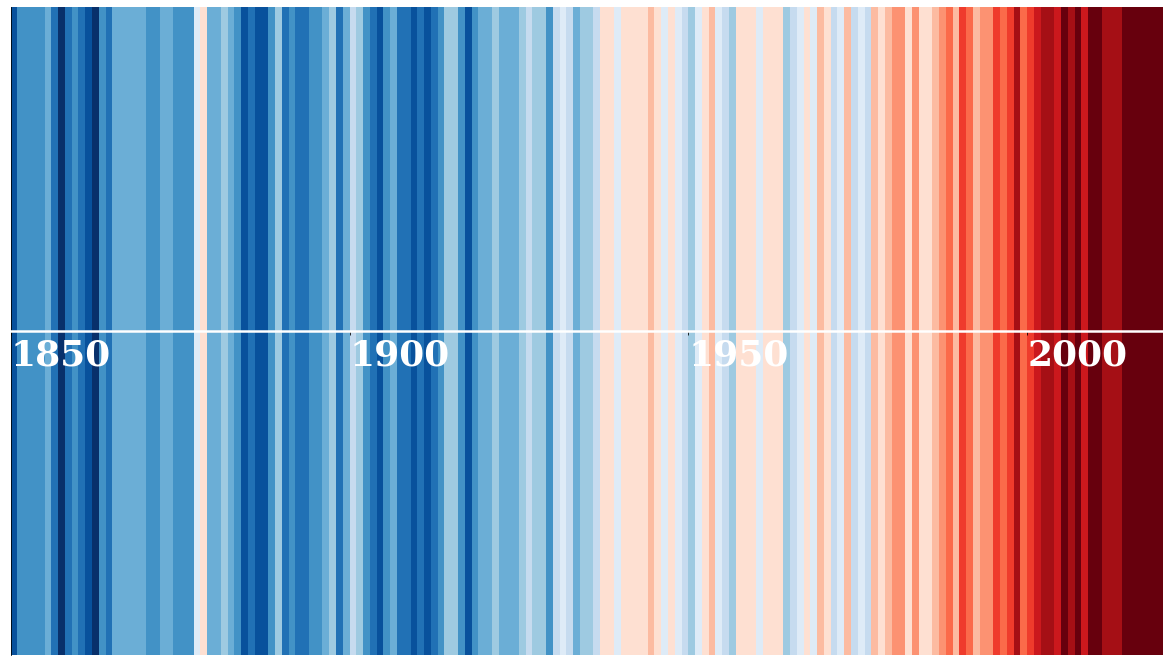

In [5]:
# Set figure size (Presentation slide size)
fig = plt.figure(figsize=(16, 9))

# Add axes
ax = fig.add_axes([0, 0, 1, 1])

# Make Y axis and borders invisible
ax.get_yaxis().set_visible(False)
sns.despine()

# create a collection with a rectangle for each year
col = PatchCollection([
    Rectangle((y, 0), 1, 1)
    for y in range(FIRST, LAST + 1)
])

# set data, colormap and color limits
col.set_array(anomaly)
col.set_cmap(cmap)
col.set_clim(reference - LIM, reference + LIM)
ax.add_collection(col)

# Set x and y axis limits
ax.set_ylim(0, 1)
ax.set_xlim(FIRST, LAST + 1)

# Save figure without time period axis
output = Wr.makeOutFile('global_warming_stripes1')
fig.savefig(output)

# Adjust X axis spine position
ax.spines['bottom'].set_position('center')
ax.spines['bottom'].set_color('white')
ax.spines['bottom'].set_linewidth(2.5)

# Font adjustments
font = FontProperties()
font.set_family('serif')
font.set_weight('bold')
font.set_size('36')
plt.xticks([1850,1900,1950,2000], color='white',
           ha='left',
           fontproperties=font)

output = Wr.makeOutFile('global_warming_stripes2')
fig.savefig(output)